In [216]:
# Import neccessary modules and access file
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import metpy.calc as calc
from metpy.units import units
import pyart
from scipy.interpolate import interp2d


Data = Dataset("orf-tornado.09100.nc")

In [217]:
# Access necessary variables (DbZ, U/V, X/Y) on slice 0 of data

dataslice = 0

# Multiplied by 1000 to get meters, data in kilometers
x = Data['xh'][:].data * 1000
y = Data['yh'][:].data * 1000

u = Data['uinterp'][dataslice,:,:].data
v = Data['vinterp'][dataslice,:,:].data
v = Data['v10'][time,:,:].data
u = Data['u10'][time,:,:].data
zvort = Data['zvort'][dataslice,:,:].data
ref = Data['dbz'][dataslice,:,:].data

# Create regular 2D grid for interpolation
x_reg = np.linspace(x.min(), x.max(), 10000)
y_reg = np.linspace(y.min(), y.max(), 10000)
x_reg, y_reg = np.meshgrid(x_reg, y_reg)

# Interpolate the data onto the regular grid
f_u = interp2d(x, y, u, kind='linear')
f_v = interp2d(x, y, v, kind='linear')

u_reg = f_u(x_reg[0, :], y_reg[:, 0])
v_reg = f_v(x_reg[0, :], y_reg[:, 0])

IndexError: v10 not found in /

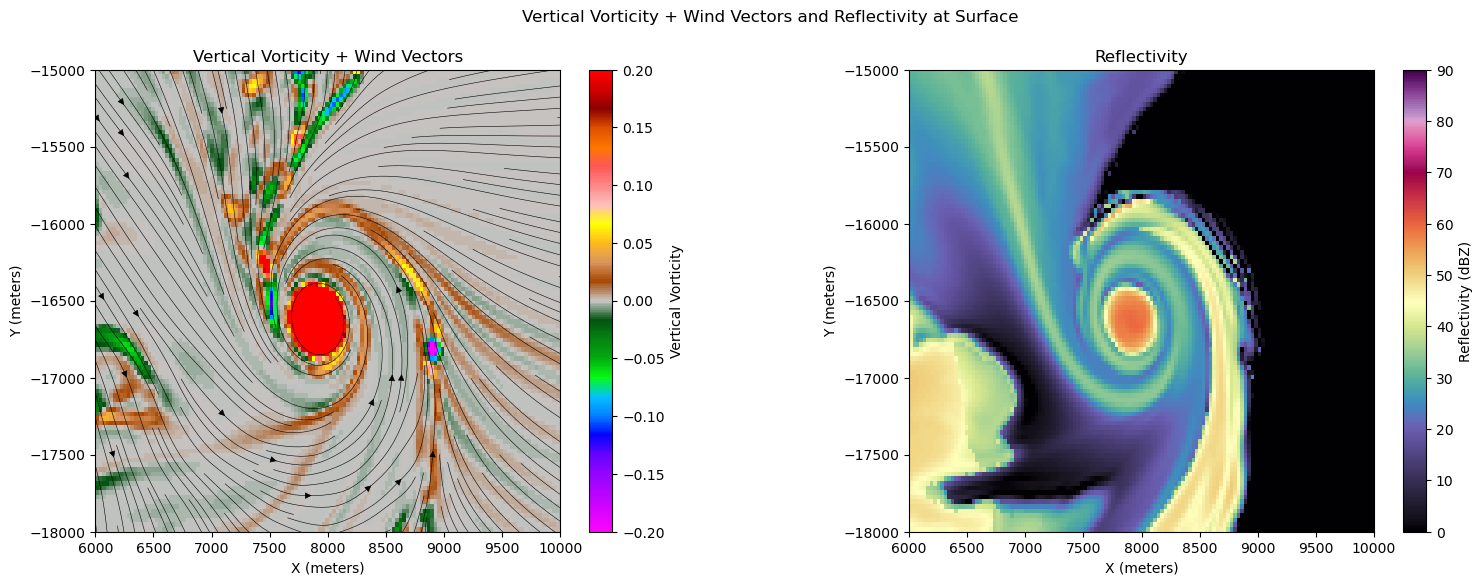

In [215]:
# Create plots with more space between subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Vertical Vorticity + Wind Vectors and Reflectivity at Surface')

# Plot vertical vorticity as colormesh overlaid by streamlines of u and v
ax1.set_title('Vertical Vorticity + Wind Vectors')

    # Plot vertical vorticity as colormesh overlaid by streamlines of u and v
ax1.set_title('Vertical Vorticity + Wind Vectors')
zvort_plot = ax1.pcolormesh(x, y, zvort, cmap='pyart_Wild25', vmin=-0.2, vmax=0.2)
cbar = plt.colorbar(zvort_plot, ax=ax1, label='Vertical Vorticity')

# Plot streamlines with default spacing
quiv = ax1.streamplot(x_reg[0, :], y_reg[:, 0], u_reg, v_reg, color='black', density=8, linewidth=0.4, arrowsize=1)

ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_xlim([6000, 10000])
ax1.set_ylim([-18000, -15000])

# Increase spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Plot reflectivity with pyart_ChaseSpectral colormap and vmax=90
ax2.set_title('Reflectivity')
ref_plot = ax2.pcolormesh(x, y, ref, cmap='pyart_ChaseSpectral', vmin=0, vmax=90)
ax2.set_xlabel('X (meters)')
ax2.set_ylabel('Y (meters)')
fig.colorbar(ref_plot, ax=ax2, label='Reflectivity (dBZ)')
ax2.set_xlim([6000, 10000])
ax2.set_ylim([-18000, -15000])

plt.show()